In [3]:
# 1.
import pandas as pd

In [4]:
# a.
series = pd.Series(data = [5.5, 4.2, 7.0, 0.6, 8.1], index = ["b", "c", "d", "f", "g"])
series

b    5.5
c    4.2
d    7.0
f    0.6
g    8.1
dtype: float64

In [6]:
# b.
series["z"] = -1.0
series

b    5.5
c    4.2
d    7.0
f    0.6
g    8.1
z   -1.0
dtype: float64

In [14]:
# c.
cars = pd.read_csv("Car_Ins.csv")
cars.shape

(221, 7)

In [15]:
cars.columns

Index(['Make', 'Model', 'Collision', 'Property', 'Size', 'Doors', 'Style'], dtype='object')

In [16]:
cars.head(20)

,Make,Model,Collision,Property,Size,Doors,Style
0,Acura,TSX,105,84.0,Midsize,4,Standard
1,Chevrolet,Malibu,90,92.0,Midsize,4,Standard
2,Chrysler,200,57,39.0,Midsize,4,Standard
3,Dodge,Avenger,109,127.0,Midsize,4,Standard
4,Ford,Fusion,99,88.0,Midsize,4,Standard
5,Ford,Fusion 4WD,112,81.0,Midsize,4,Standard
6,Ford,Fusion hybrid,125,95.0,Midsize,4,Standard
7,Honda,Accord,81,85.0,Midsize,4,Standard
8,Hyundai,Sonata,103,84.0,Midsize,4,Standard
9,Kia,Optima,88,75.0,Midsize,4,Standard


In [18]:
# d.
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       221 non-null    object 
 1   Model      221 non-null    object 
 2   Collision  221 non-null    int64  
 3   Property   177 non-null    float64
 4   Size       221 non-null    object 
 5   Doors      221 non-null    int64  
 6   Style      221 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 12.2+ KB


Based on the info table above, the property column has 44 missing values.

In [23]:
cars.loc[25,"Property"]

np.float64(nan)

In [24]:
cars.iloc[0, 144:150]

Series([], Name: 0, dtype: object)

In [28]:
# e.
cars.describe()

,Collision,Property,Doors
count,221.000000,177.000000,221.000000
mean,143.719457,88.000000,3.303167
std,70.890973,20.851204,0.955101
min,56.000000,23.000000,2.000000
25%,105.000000,78.000000,2.000000
50%,127.000000,88.000000,4.000000
75%,166.000000,100.000000,4.000000
max,748.000000,165.000000,4.000000


collision min: 56.0
collision q1: 105.0
collision median: 127.0
collision q3: 166.0
collision max: 748.0

In [29]:
cars.describe(include = object)

,Make,Model,Size,Style
count,221,221,221,221
unique,33,212,6,3
top,BMW,Altima,Midsize,Luxury
freq,20,2,98,94


In [30]:
crosstab = pd.crosstab(cars["Style"],cars["Size"],margins=True)
crosstab

Size,Large,Micro,Midsize,Mini,Small,XLarge,All
Style,,,,,,,
Luxury,32,0,45,0,0,17,94
Sports,8,0,20,1,5,0,34
Standard,13,2,33,12,33,0,93
All,53,2,98,13,38,17,221


In [37]:
carsDF = cars.dropna()
carsDF.shape

(177, 7)

In [42]:
carsDF.iloc[144:150]

,Make,Model,Collision,Property,Size,Doors,Style
173,BMW,7 series 4dr 4WD LWB,265,99.0,XLarge,4,Luxury
174,BMW,7 series 4dr LWB,225,92.0,XLarge,4,Luxury
175,Lexus,LS 460 4dr,171,87.0,XLarge,4,Luxury
176,Lexus,LS 460 4dr 4WD,180,101.0,XLarge,4,Luxury
179,Lincoln,MKS 4dr,127,84.0,XLarge,4,Luxury
180,Lincoln,MKS 4dr 4WD,147,102.0,XLarge,4,Luxury


In [45]:
# g.
cars = cars.fillna(127)
cars.iloc[144:150]

,Make,Model,Collision,Property,Size,Doors,Style
144,BMW,3 series station wagon 4WD,88,127.0,Midsize,4,Luxury
145,BMW,M3 2dr,304,73.0,Midsize,2,Luxury
146,BMW,M3 4dr,247,127.0,Midsize,4,Luxury
147,BMW,M3 convertible,231,127.0,Midsize,2,Luxury
148,Infiniti,G25 4dr,98,127.0,Midsize,4,Luxury
149,Infiniti,G25 4dr 4WD,92,127.0,Midsize,4,Luxury


In [46]:
# h.
cars[cars["Collision"] > 250]

,Make,Model,Collision,Property,Size,Doors,Style
51,Mitsubishi,Lancer Evolution 4WD,260,127.0,Small,4,Standard
145,BMW,M3 2dr,304,73.0,Midsize,2,Luxury
162,Lexus,IS-F 4dr 4WD,299,127.0,Midsize,4,Luxury
173,BMW,7 series 4dr 4WD LWB,265,99.0,XLarge,4,Luxury
183,Maserati,Quattroporte 4dr,328,127.0,XLarge,4,Luxury
186,Mercedes,Benz S class hybrid 4dr,335,127.0,XLarge,4,Luxury
192,Maserati,Granturismo 2dr,437,127.0,Large,2,Sports
194,Porsche,Panamera turbo 4dr 4WD,398,127.0,Large,4,Sports
200,Ferrari,California convertible,748,127.0,Midsize,2,Sports
211,Nissan,GT-R 2dr 4WD,325,54.0,Midsize,2,Sports


In [47]:
cars.loc[51, "Collision"] = 160
cars.loc[51]

Make                    Mitsubishi
Model         Lancer Evolution 4WD
Collision                      160
Property                     127.0
Size                         Small
Doors                            4
Style                     Standard
Name: 51, dtype: object

In [48]:
# 2.

In [52]:
# a.
a = "statistically"
if (len(a) > 10):
    print("a is long")
elif (len(a) >= 5 and len(a) <= 10):
    print("a is medium length")
else:
    print("a is short")

a is long


In [53]:
# b.
a = "statistics"
if (len(a) > 10):
    print("a is long")
elif (len(a) >= 5 and len(a) <= 10):
    print("a is medium length")
else:
    print("a is short")

a is medium length


In [54]:
a = "stat"
if (len(a) > 10):
    print("a is long")
elif (len(a) >= 5 and len(a) <= 10):
    print("a is medium length")
else:
    print("a is short")

a is short


In [57]:
# c.
for x in range(25):
    if (x > 0 and x % 3 == 0):
        print(x)
        if (x % 2 == 0):
            print("Even.")
        else:
            print("Odd.")

3
Odd.
6
Even.
9
Odd.
12
Even.
15
Odd.
18
Even.
21
Odd.
24
Even.


In [58]:
# d.
import numpy as np

In [62]:
numList = [9,25,49,81,121]

for x in numList:
    log = (lambda n: np.log(n))(x)
    exp = np.exp(log)
    print(f"Original: {x}, Logarithm: {log}, Exponential of the logarithm: {exp}")

Original: 9, Logarithm: 2.1972245773362196, Exponential of the logarithm: 9.000000000000002
Original: 25, Logarithm: 3.2188758248682006, Exponential of the logarithm: 24.999999999999996
Original: 49, Logarithm: 3.8918202981106265, Exponential of the logarithm: 48.99999999999999
Original: 81, Logarithm: 4.394449154672439, Exponential of the logarithm: 81.00000000000003
Original: 121, Logarithm: 4.795790545596741, Exponential of the logarithm: 121.00000000000003


In [63]:
# 3.
import pandas as pd
import scipy.stats as st

In [65]:
cars = pd.read_csv("Car_Ins.csv")

In [67]:
# a.
loc = cars["Collision"].mean()
df = len(cars["Collision"])-1
scale = st.sem(cars["Collision"])
st.t.interval(confidence =.95, df = df, loc = loc, scale = scale)

(np.float64(134.32138896493728), np.float64(153.11752506221205))

In [69]:
# b.
st.ttest_1samp(cars["Collision"], 152, alternative = 'less')

TtestResult(statistic=np.float64(-1.736456933612532), pvalue=np.float64(0.041941462719035746), df=np.int64(220))

Since the p-value is ~0.04, which is less than α = 0.05, we can reject the null hypothesis. We have enough evidence to suggest that the mean collision index is less than 152.

In [2]:
# 4.
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv("Movies_Data.csv")

<Axes: xlabel='TrailerViews', ylabel='BoxOffice'>

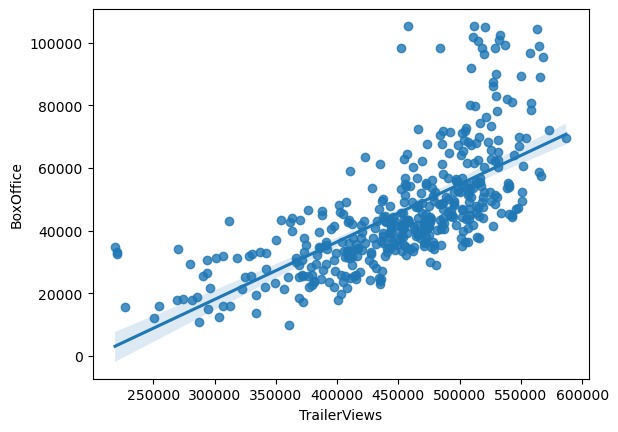

In [4]:
# a.
sns.regplot(x=movies["TrailerViews"],y=movies["BoxOffice"])

I would say that visually, the line represents the data somewhat well—a lot of the points are on/close to the regression lin, though there seem to be outliers.

In [9]:
# b.
y = movies["BoxOffice"]
x = movies["TrailerViews"]
x_const = sm.add_constant(x)
model = sm.OLS(y,x_const)
results = model.fit()
print(results.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:              BoxOffice   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
No. Observations:                 426   F-statistic:                     375.5
Covariance Type:            nonrobust   Prob (F-statistic):           2.27e-60
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -3.72e+04   4338.850     -8.574      0.000   -4.57e+04   -2.87e+04
TrailerViews     0.1840      0.009     19.378      0.000       0.165       0.203

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.


R-square is 0.470, which means that trailer views for movies only account for 47% of box office sales.

In [14]:
# c.
import statsmodels.formula.api as smf
model = smf.ols(formula="BoxOffice ~ Budget + ScreenCoverage + RunTime + TrailerViews + DirectorRating", data=movies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BoxOffice   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           3.25e-79
Time:                        19:32:52   Log-Likelihood:                -4603.8
No. Observations:                 426   AIC:                             9220.
Df Residuals:                     420   BIC:                             9244.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.018e+05   1.05e+04     -9.737      0.000   -1.22e+05   -8.12e+04
Budget             1.7397      0.174      9.988      0.000       1.397       2.082
ScreenCoverage  2.584e+04   7711.292      3.351      0.001    1.07e+04     4.1e+04
RunTime          -36.3554     35.059     -1.037      0.300    -105.268      32.558
TrailerViews       0.1174      0.012      9.445      0.000       0.093       0.142
DirectorRating  3450.2376    860.198      4.011      0.000    1759.408    5141.067
==============================================================================
Omnibus:                      131.782   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              435.031
Skew:                           1.403   Prob(JB):                     3.42e-95
Kurtosis:                       7.079   Cond. No.                     9.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared = 0.591, meaning that ony 59.1% of BoxOffice variability is explained by the predictors.

In [15]:
# d.
model = smf.ols(formula="BoxOffice ~ Budget + ScreenCoverage + TrailerViews + DirectorRating", data=movies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BoxOffice   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     151.4
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           4.23e-80
Time:                        19:34:35   Log-Likelihood:                -4604.4
No. Observations:                 426   AIC:                             9219.
Df Residuals:                     421   BIC:                             9239.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.057e+05   9764.059    -10.822      0.000   -1.25e+05   -8.65e+04
Budget             1.7163      0.173      9.936      0.000       1.377       2.056
ScreenCoverage  2.796e+04   7436.163      3.760      0.000    1.33e+04    4.26e+04
TrailerViews       0.1217      0.012     10.357      0.000       0.099       0.145
DirectorRating  3036.0615    761.917      3.985      0.000    1538.426    4533.697
==============================================================================
Omnibus:                      127.355   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.475
Skew:                           1.372   Prob(JB):                     1.09e-87
Kurtosis:                       6.877   Cond. No.                     8.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared is now 0.59. The value was barely impacted, signifying that RunTime, in fact, is not significant.

In [18]:
# 5.
y = movies["BoxOffice"]
xCols = ["Budget","ProductionCost","ScreenCoverage","DirectorRating","CriticRating","TrailerViews"]
x = movies[xCols]

In [21]:
# a.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3732)
print(x_train.head() ,"\n\n", x_test.head())

       Budget  ProductionCost  ScreenCoverage  DirectorRating  CriticRating  \
146  35019.49           73.12           0.516            9.17          6.38   
274  34171.65           91.46           0.221            8.93          7.17   
166  31357.46           91.05           0.272            8.66          7.35   
52   35848.20           91.03           0.363            9.53          7.61   
195  35583.46           75.31           0.410            8.73          8.28   

     TrailerViews  
146        443673  
274        359958  
166        254305  
52         381020  
195        419493   

        Budget  ProductionCost  ScreenCoverage  DirectorRating  CriticRating  \
399  42753.88           61.74           0.599            7.72          8.26   
375  33978.87           74.34           0.375            8.20          7.07   
66   31895.84           81.97           0.496            8.76          8.52   
98   33031.46           93.96           0.400            9.13          7.65   
77   34

In [25]:
# b.
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
model = DecisionTreeRegressor(random_state=3732)
model.fit(x_train, y_train)
prediction = model.predict(x_test)
metrics.r2_score(y_test, prediction) 

0.5125345711934235

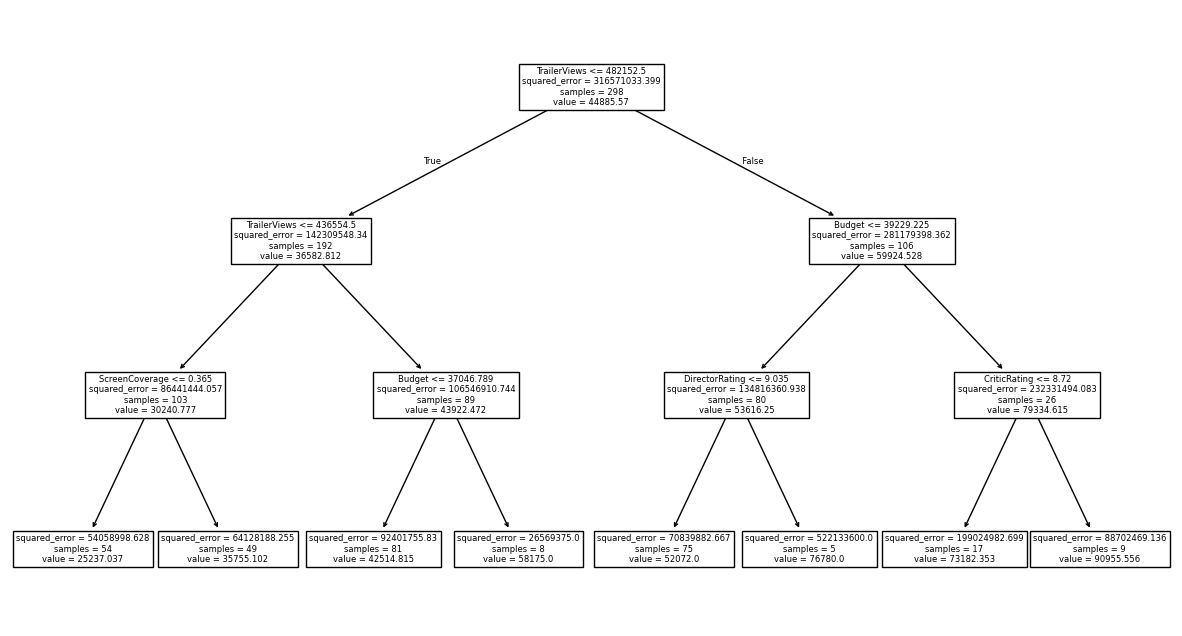

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
model2 = DecisionTreeRegressor(max_depth=3, min_samples_split=4, random_state=3732)
model2.fit(x_train, y_train)
plt.figure(figsize=(15,8))
plot_tree(model2, feature_names=x.columns,)
plt.show()

In [29]:
# d.
prediction2 = model2.predict(x_test)
metrics.r2_score(y_test, prediction2)

0.6608891302465321

The first model was likely overfitting, since the r-squared value is smaller than that of the second model. It doesn't generalize well since because it only factors in training data.